## Step 1

### Importing libraries and data  

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## Step 2

In [3]:
# Define path
path = r'C:\Users\ASUS\World Happiness Report 04.2024\02 Data\Prepared Data'



In [4]:
# Load the pickle file
df_World = pd.read_pickle(os.path.join(path, 'df_World_62.pkl'))

In [5]:
df_World.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Score category
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,Low score
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,Low score
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,Middle score
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Low score
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Low score


## Step 3 

### Removing non-numeric columns

In [6]:
df_World = df_World.drop(columns=['Country name'])


In [7]:
df_World = df_World.drop(columns=['Score category'])

In [8]:
df_World.columns


Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

## Step 4

 ### The elbow technique

In [9]:
# Select columns which are object type (categorical)
categorical_cols = df_World.select_dtypes(include=['object']).columns

In [10]:
# Use pd.get_dummies to convert categorical columns to one-hot encoded variables
df_encoded = pd.get_dummies(df_World, columns=categorical_cols)

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df_World).score(df_World) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-145780.9060586056,
 -68116.53396437987,
 -48655.75704966247,
 -37686.90503332323,
 -29668.61607463213,
 -23924.382062788824,
 -21318.57932628183,
 -18687.63639948518,
 -16429.16016586296]

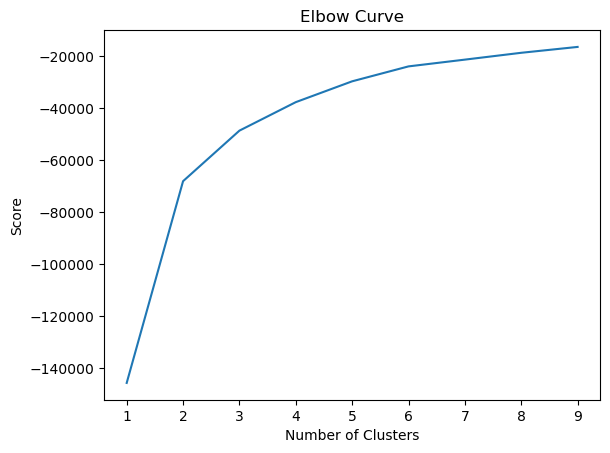

In [13]:


# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [14]:
#There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for clusters is three.¶

### k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(df_World)

KMeans(n_clusters=3)

In [17]:
df_World['clusters'] = kmeans.fit_predict(df_World )
                               

In [18]:
df_World.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,clusters
0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,2
1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,2
2,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,2
3,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,2
4,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,2


In [19]:
df_World['clusters'].value_counts()

clusters
0    752
1    674
2    523
Name: count, dtype: int64

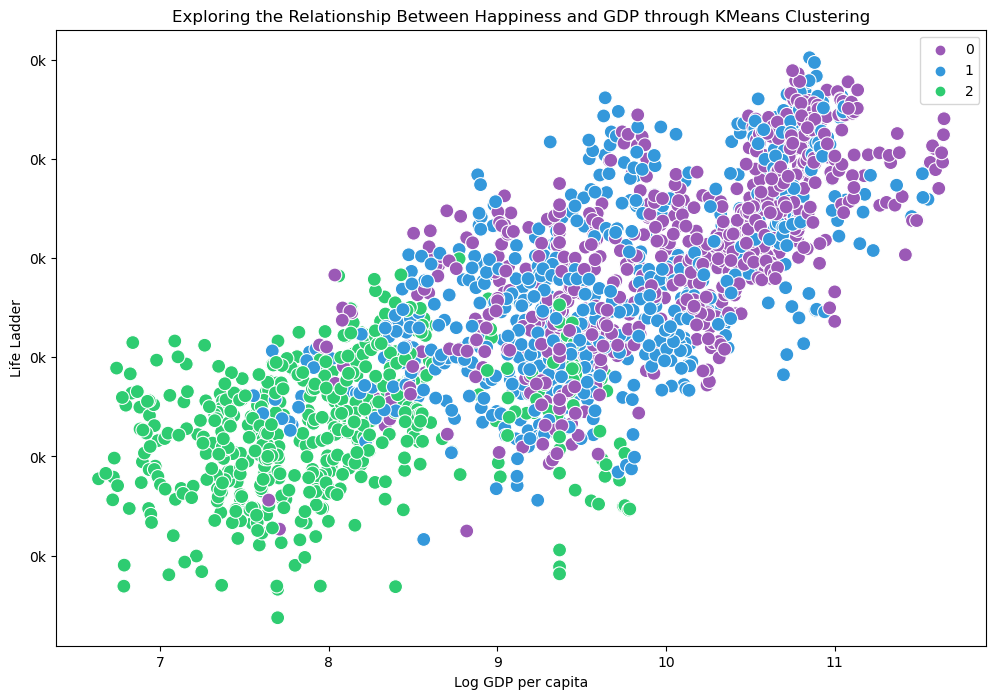

In [20]:
# Plotting
plt.figure(figsize=(12, 8))

# Custom color palette
palette = sns.color_palette(['#9b59b6', '#3498db', '#2ecc71',])  # Dark purple, blue, green

# Scatterplot
ax = sns.scatterplot(x=df_World['Log GDP per capita'], y=df_World['Life Ladder'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background
ax.grid(False)

# x-axis and y-axis labels
plt.xlabel('Log GDP per capita')
plt.ylabel('Life Ladder')

# Title
plt.title('Exploring the Relationship Between Happiness and GDP through KMeans Clustering')

# Assigning names to clusters based on the label
df_World['cluster'] = df_World['clusters'].map({
    0: 'dark purple',
    1: 'blue',
    2: 'green',
    3: 'red'
})

# Format the y-axis labels to show 'Price' in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Define the path where you want to save the plot
save_path = r'C:\Users\ASUS\World Happiness Report 04.2024\04 Analysis\Visualizations\cluster_plot.png'

# Save the plot to the specified path
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [21]:
df_World.groupby('cluster').agg({'Life Ladder':['mean', 'median'], 
                         
                         'Log GDP per capita':['mean', 'median'],
                         'Social support':['mean', 'median'],
                          'Healthy life expectancy at birth':['mean', 'median'],
                         'Freedom to make life choices':['mean', 'median'], 
                          'Generosity':['mean', 'median'],       
                         'Perceptions of corruption':['mean', 'median']})

Life Ladder         Log GDP per capita         Social support  \
                   mean  median               mean  median           mean   
cluster                                                                     
blue           5.709789  5.5780           9.671427   9.598       0.842662   
dark purple    6.061174  6.0405          10.046208  10.180       0.863525   
green          4.298677  4.3390           8.003488   7.950       0.700458   

                   Healthy life expectancy at birth         \
            median                             mean median   
cluster                                                      
blue         0.860                        65.496669  65.12   
dark purple  0.887                        68.536507  68.10   
green        0.718                        53.161015  54.00   

            Freedom to make life choices           Generosity         \
                                    mean    median       mean median   
cluster                                                                
blue                            0.723123  0.742558  -0.013517 -0.024   
dark purple                     0.800152  0.824000  -0.004165 -0.032   
green                           0.684791  0.710000   0.023792 -0.004   

            Perceptions of corruption          
                                 mean  median  
cluster                                        
blue                         0.762045  0.7945  
dark purple                  0.705984  0.7585  
green                        0.787054  0.8140

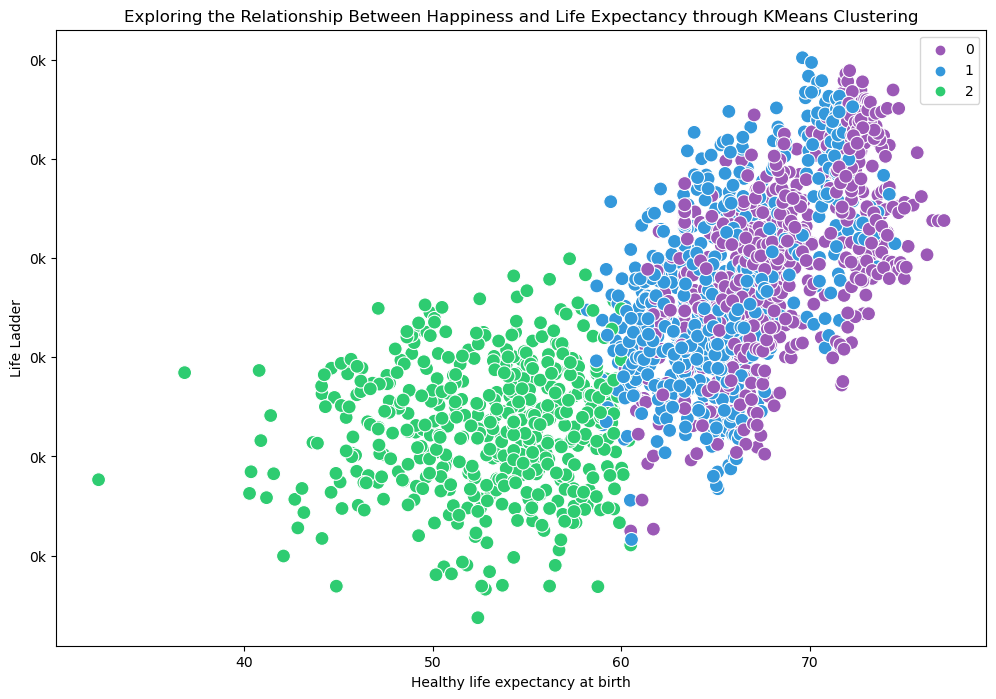

In [22]:
# Plotting
plt.figure(figsize=(12, 8))

# Custom color palette
palette = sns.color_palette(['#9b59b6', '#3498db', '#2ecc71'])  # Dark purple, blue, green

# Scatterplot
ax = sns.scatterplot(x=df_World['Healthy life expectancy at birth'], y=df_World['Life Ladder'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background
ax.grid(False)

# x-axis and y-axis labels
plt.xlabel('Healthy life expectancy at birth')
plt.ylabel('Life Ladder')

# Title
plt.title('Exploring the Relationship Between Happiness and Life Expectancy through KMeans Clustering')

# Assigning names to clusters based on the label
df_World['cluster'] = df_World['clusters'].map({
    0: 'dark purple',
    1: 'blue',
    2: 'green',
    3: 'red'
})

# Format the y-axis labels to show 'Price' in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Define the path where you want to save the plot
save_path = r'C:\Users\ASUS\World Happiness Report 04.2024\04 Analysis\Visualizations\cluster_plot_2.png'

# Save the plot to the specified path
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

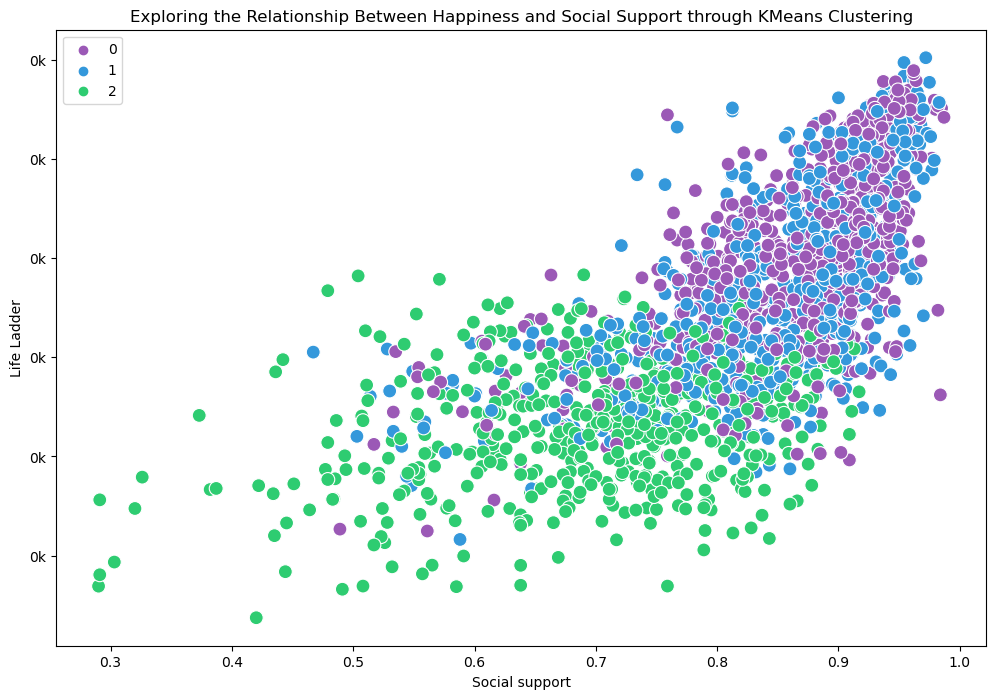

In [23]:
# Plotting
plt.figure(figsize=(12, 8))

# Custom color palette
palette = sns.color_palette(['#9b59b6', '#3498db', '#2ecc71'])  # Dark purple, blue, green

# Scatterplot
ax = sns.scatterplot(x=df_World['Social support'], y=df_World['Life Ladder'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background
ax.grid(False)

# x-axis and y-axis labels
plt.xlabel('Social support')
plt.ylabel('Life Ladder')

# Title
plt.title('Exploring the Relationship Between Happiness and Social Support through KMeans Clustering')

# Assigning names to clusters based on the label
df_World['cluster'] = df_World['clusters'].map({
    0: 'dark purple',
    1: 'blue',
    2: 'green',
    3: 'red'
})

# Format the y-axis labels to show 'Price' in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Define the path where you want to save the plot
save_path = r'C:\Users\ASUS\World Happiness Report 04.2024\04 Analysis\Visualizations\cluster_plot_3.png'

# Save the plot to the specified path
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

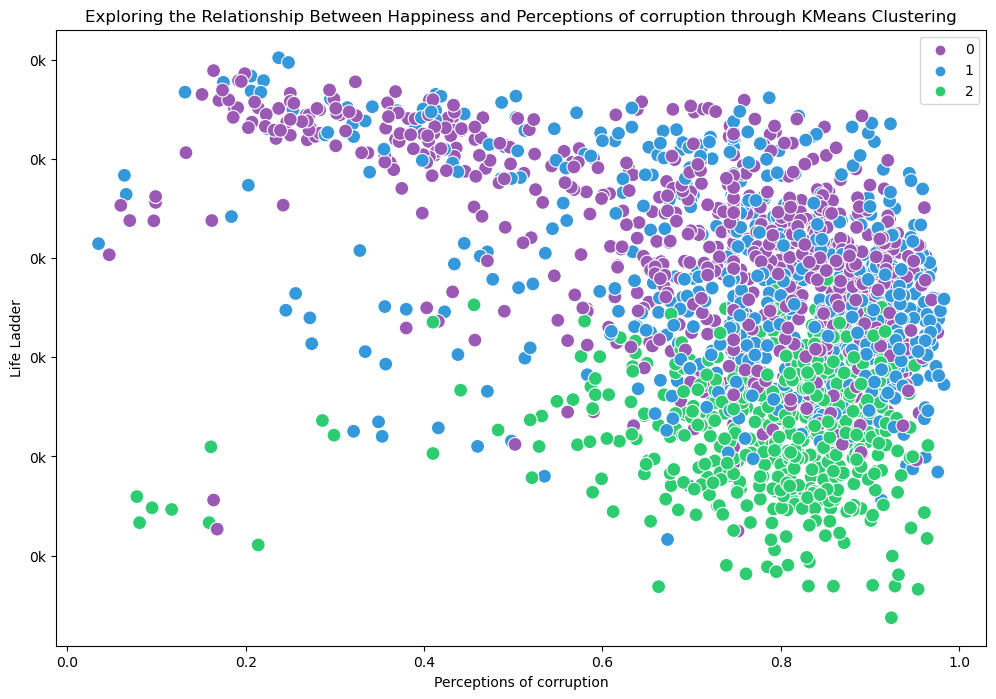

In [24]:
# Plotting
plt.figure(figsize=(12, 8))

# Custom color palette
palette = sns.color_palette(['#9b59b6', '#3498db', '#2ecc71'])  # Dark purple, blue, green

# Scatterplot
ax = sns.scatterplot(x=df_World['Perceptions of corruption'], y=df_World['Life Ladder'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background
ax.grid(False)

# x-axis and y-axis labels
plt.xlabel('Perceptions of corruption')
plt.ylabel('Life Ladder')

# Title
plt.title('Exploring the Relationship Between Happiness and Perceptions of corruption through KMeans Clustering')

# Assigning names to clusters based on the label
df_World['cluster'] = df_World['clusters'].map({
    0: 'dark purple',
    1: 'blue',
    2: 'green',
    3: 'red'
})

# Format the y-axis labels to show 'Price' in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Define the path where you want to save the plot
save_path = r'C:\Users\ASUS\World Happiness Report 04.2024\04 Analysis\Visualizations\cluster_plot_4.png'

# Save the plot to the specified path
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

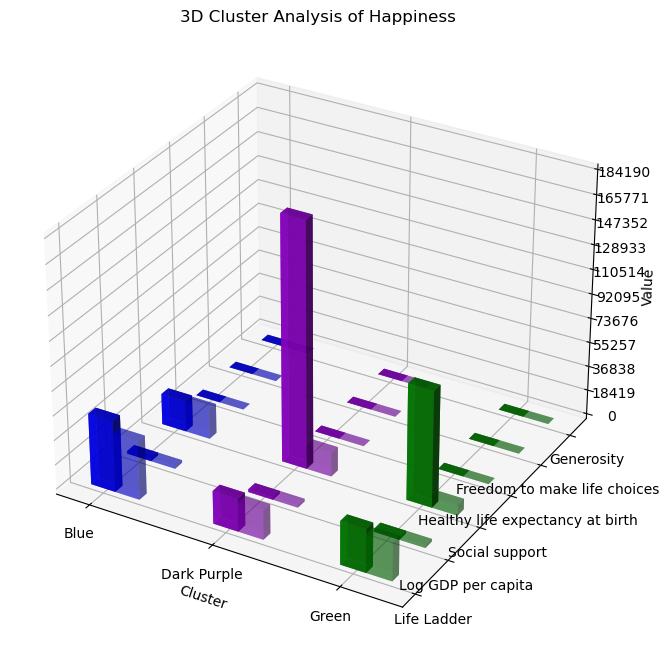

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data for the 3D chart
data = np.array([
    [53549, 2020, 23357, 7.22, 4, 5],  # Blue cluster mean values
    [24652, 2015, 184194, 7.96, 4, 5],  # Dark Purple cluster mean values
    [32592, 2017, 87423, 7.41, 4, 5],   # Green cluster mean values
    [43995, 2021, 22508, 7.3, 4, 5],    # Blue cluster median values
    [21999, 2015, 17921, 8.0, 4, 5],    # Dark Purple cluster median values
    [28999, 2017, 8039, 7.4, 4, 5]      # Green cluster median values
])

# Set up the figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set up the grid and the ticks
x_ticks = np.arange(3)  # Number of clusters
y_ticks = np.arange(data.shape[1])  # Number of attributes
z_ticks = np.arange(0, int(data.max()) + 1, int(data.max() / 10))
x_labels = ['Blue', 'Dark Purple', 'Green']
y_labels = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity']  # Exclude 'Perceptions of corruption' as it is not included in the data

# Define the colors and the bar width
colors = ['blue', 'darkviolet', 'green']
bar_width = 0.2

# Loop over the clusters and attributes and plot the bars
for i in range(len(x_ticks)):
    for j in range(len(y_ticks)):
        # Mean values
        ax.bar3d(x_ticks[i], j, 0, bar_width, bar_width, data[i, j], color=colors[i], alpha=0.8)
        # Median values (shorter bars)
        ax.bar3d(x_ticks[i] + bar_width, j, 0, bar_width, bar_width, data[i + 3, j], color=colors[i], alpha=0.4)

# Set labels
ax.set_xticks(x_ticks + bar_width / 2)
ax.set_xticklabels(x_labels)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_zticks(z_ticks)

# Set title and labels
ax.set_title('3D Cluster Analysis of Happiness')
ax.set_xlabel('Cluster')
ax.set_zlabel('Value')

# Save and show the plot
save_path = r'C:\Users\ASUS\World Happiness Report 04.2024\04 Analysis\Visualizations\cluster_plot_5.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

